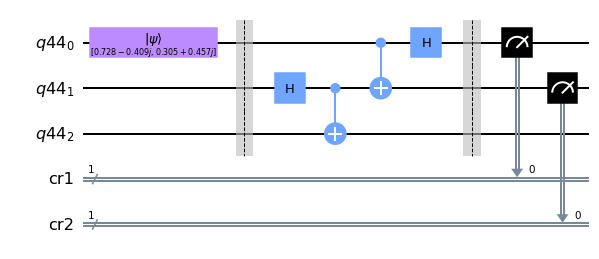

In [113]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import random_statevector

qr = QuantumRegister(3) # Protocol uses 3 qubits
cr1 = ClassicalRegister(1, name="cr1")
cr2 = ClassicalRegister(1, name="cr2")
tel = QuantumCircuit(qr, cr1, cr2)

# Rand qubit
psi = random_statevector(2)

tel.initialize(psi, 0)
tel.barrier()
tel.h(1)
tel.cx(1, 2)
tel.cx(0, 1)
tel.h(0)
tel.barrier()
tel.measure(0, 0)
tel.measure(1, 1)
tel.draw(output='mpl')

In [114]:
from qiskit import Aer
from qiskit import assemble

symulator = Aer.get_backend('qasm_simulator')
telas = assemble(tel, shots=1)
wyniki = symulator.run(telas)

In [115]:
hist = wyniki.result().get_counts()
print(hist)

{'1 1': 1}


In [116]:
tel.x(2).c_if(cr1, 1) # if cr1 = 1 -> use tel gate X
tel.z(2).c_if(cr2, 1)

In [117]:
sym = Aer.get_backend('statevector_simulator')
qpom = assemble(tel)
result = sym.run(qpom).result()
stan_wektora = result.get_statevector()
print(stan_wektora)

Statevector([ 0.        +0.j        , -0.30460107-0.45749871j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.72825782-0.40933319j,
              0.        +0.j        ,  0.        -0.j        ],
            dims=(2, 2, 2))


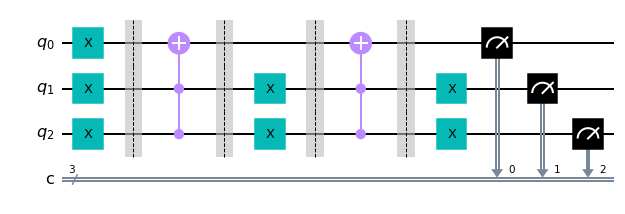

In [224]:
circ = QuantumCircuit(3, 3)

def uf_fun(circ, x):
    if (x == 1):
        circ.x(0)
        circ.barrier()
    if (x == 2):
        circ.x(1)
        circ.barrier()
    if (x == 3):
        circ.x(0)
        circ.x(1)
        circ.barrier()
    if (x == 4):
        circ.x(2)
        circ.barrier()
    if (x == 5):
        circ.x(2)
        circ.x(0)
        circ.barrier()
    if (x == 6):
        circ.x(2)
        circ.x(1)
        circ.barrier()
    if (x == 7):
        circ.x(2)
        circ.x(1)
        circ.x(0)
        circ.barrier()
        
    circ.ccx(2, 1, 0)

    circ.barrier()
    circ.x(2)
    circ.x(1)

    circ.barrier()
    circ.ccx(2, 1, 0)

    circ.barrier()
    circ.x(2)
    circ.x(1)

    circ.measure(0, 0) # pomiar qubit 0 na bit 0
    circ.measure(1, 1) # pomiar qubit 1 na bit 1
    circ.measure(2, 2) # pomiar qubit 1 na bit 1


uf_fun(circ, 7)
    
circ.draw(output="mpl")

In [225]:
qobj = assemble(circ, shots=1)
wyniki = symulator.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

{'110': 1}


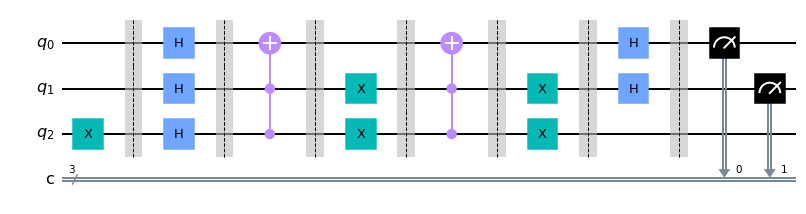

In [267]:
circ2 = QuantumCircuit(3, 3)

#circ2.x(0)
#circ2.x(1)
circ2.x(2)

circ2.barrier()

circ2.h(0)
circ2.h(1)
circ2.h(2)
circ2.barrier()

circ2.ccx(2, 1, 0)

circ2.barrier()
circ2.x(2)
circ2.x(1)

circ2.barrier()
circ2.ccx(2, 1, 0)

circ2.barrier()
circ2.x(2)
circ2.x(1)
circ2.barrier()

circ2.h(0)
circ2.h(1)
circ2.barrier()

circ2.measure(0, 0)
circ2.measure(1, 1)

circ2.draw(output="mpl")

In [268]:
qobj = assemble(circ2, shots=1)
wyniki = symulator.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

{'000': 1}
